# Até agora...
---

O objetivo deste curso é **apresentar o Jupyter com reprodutibilidade para a realização de projetos em Ciência de Dados**. Utilizando dessa ferramenta, estamos passando pelas principais etapas de um projeto de Ciência de Dados, e até agora vimos:

- [Jupyter Básico](../2.Basico/2.1.Estrutura.Geral.ipynb)
- [Preparação de Dados para Ciência](../3.Preparacao/3.1.Importacao.Dados.ipynb)
- [Integração, Transformação, Redução](../4.Transformacao/4.1.Integracao.ipynb)

Se você ainda está com dúvida em alguma dessas etapas e/ou algum conceito ainda não está muito claro, por favor não deixe de revisitar esses notebooks e, se necessário, consulte o [texto do capítulo](https://sol.sbc.org.br/livros/index.php/sbc/catalog/view/67/292/544-1).

# Conectar com Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

%cd /content/gdrive/MyDrive/Colab/jai2021-jupyter-colab/4.Transformacao

!ls

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab/jai2021-jupyter-colab/4.Transformacao
4.1.Integracao.ipynb  4.2.Transformacao.ipynb  4.3.Reducao.ipynb


In [2]:
# Importando o pacote necessário
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Redução de Dados
---

Para finalizar a seção de *Preparação de dados*, nós vamos explorar a <ins>**Redução de dados**</ins>, uma etapa fundamental para lidar com grandes volumes de dados. De fato, gerenciar e processar dados requer tempo, esforço e recursos quando estamos lidando com alta dimensionalidade. 

Para enfrentar tais desafios, técnicas de <ins>**Redução de dados**</ins> são aplicadas. No entanto, embora sejam **essenciais**, essas técnicas geralmente são **complexas**, pois exigem amplo conhecimento para a escolha adequada de qual técnica utilizar. 

Assim, para simplificar, essa etapa irá apresentar apenas uma técnica muito utilizada de *Redução de dimensionalidade*.

## Análise de Componentes Principais (PCA)

O PCA, ou Análise de Componentes Principais, é um dos métodos mais simples e, de longe, o mais comum para a *Redução da dimensionalidade*. 

Existem diversos motivos para aplicar a redução a partir do PCA. Mas, uma razão bem comum é quando coletamos muitos dados e não sabemos por onde começar nossas análises. Assim, ao aplicar o PCA podemos reduzi-los em poucas dimensões e, em seguida, plotá-los e estudar possíveis padrões. 

> **Como ele funciona?** 🤔

Considere a tabela `Tracks` que contém informações sobre os *hits* do Spotify dos últimos anos. Nesta tabela, nós temos extamente 14 características musicais. Ou seja, temos um conjunto de dados de **14 dimensões**. Certo?

Imagine agora que você está preocupado que não haja diferença em qualquer uma dessas características que nos ajude a classificar músicas entre *Solo* e *Colaborações*. Portanto, precisamos investigar mais a fundo todas essas características.

> **Mas como você plota dados de 14 dimensões?** 🤔

É exatamente aí que o PCA entra para salvar o dia! 🙌

Em resumo, o método irá "espremer" essas 14 dimensões em, por exemplo, apenas **2** dimensões!!

Ou seja, enquanto antes nós tínhamos cada música associada a 14 características diferentes; agora, elas terão apenas 2 variáveis associadas a elas. 

Assim, podemos plotar esses dois números em um gráfico de dispersão, permitindo analisar se há alguma diferença entre as músicas *Solo* e *Colaborações*.

### EXEMPLO

Especificamente, o PCA é um algoritmo não supervisionado que busca encontrar um meio de condensar a informação dos atributos originais do conjunto de dados em um conjunto menor de variáveis estatísticas (**componentes principais**) com uma perda mínima de informação. 

O número de componentes principais se torna o número de variáveis consideradas na análise, mas geralmente as primeiras componentes são as mais importantes já que explicam a maior parte da variação total dos dados.

Para entender melhor como o PCA funciona, vamos utilizar o seguinte exemplo:

#### 1. Criar o *DataFrame*

Para exemplificar, nós vamos utilizar as características acústicas da tabela `Tracks` e verificar se tais características podem ser úteis para classificar as músicas de acordo com o tipo delas (i.e., se são músicas *Solo* ou *Colaborações*).

In [3]:
cols = [
    'duration_ms', 'key', 'mode', 'time_signature', 'acousticness',
    'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
    'speechiness', 'valence', 'tempo', 'song_type'
]

# Selecionando algumas colunas da tabela Tracks
data = pd.read_table('../dataset/spotify_hits_dataset_complete.tsv', encoding='utf-8', usecols=cols)
data.head()

,song_type,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,Solo,159381,10,0,4,0.12300,0.784,0.430,0.000000,0.0887,-8.756,0.0364,0.236,127.087
1,Solo,188800,9,1,4,0.16200,0.775,0.757,0.000000,0.1480,-4.139,0.1750,0.562,142.933
2,Solo,180950,10,0,4,0.11300,0.882,0.530,0.479000,0.0838,-8.544,0.2330,0.171,109.090
3,Solo,160638,4,1,4,0.04750,0.882,0.612,0.000005,0.1820,-6.103,0.1180,0.742,147.982
4,Collaboration,139460,5,0,4,0.00473,0.731,0.675,0.000000,0.1410,-5.134,0.0434,0.298,124.939


In [4]:
print(data.shape) # número total de observações e atributos

(1284, 14)


#### 2. Pré-processamento dos dados

Com o conjunto de dados criado, realizamos um pré-processamento dos dados:

1. Separamos os dados em preditores (X) e variável *target* (y)

In [5]:
# Separando preditores (X) da variável target (y)
y = data.song_type # variável target
X = data.drop('song_type', axis=1) # conjunto de preditores

2. Padronizamos os preditores usando o transformador `StandardScaler` do módulo `sklearn.preprocessing` da biblioteca `sklearn`

In [6]:
# Padronizando os dados de treino utilizando
X = StandardScaler().fit_transform(X)

⚠️ **OBSERVAÇÃO!** Note que nós padronizamos o conjunto de dados para que os atributos em maior escala não dominem os novos componentes principais. 

#### 3. Aplicamos o algoritmo PCA

Agora, podemos aplicar o algoritmo PCA. 

Para isso, iremos utilizar a biblioteca *sklearn* para importar o módulo `sklearn.decomposition` e a classe `PCA` para extrair os dois componentes principais `(n_components = 2)` do nosso conjunto de dados:

In [7]:
# Calculando os dois componentes principais
pca_resultado = PCA(n_components=2)
componentes = pca_resultado.fit_transform(X) # extraindo os dois componentes

df_pcs = pd.DataFrame(componentes, columns=['PC1', 'PC2',])
df_pcs.head()

,PC1,PC2
0,0.943156,1.458922
1,-1.422679,0.137331
2,1.400128,2.618462
3,-1.138947,0.604487
4,-0.587782,0.315846


O *DataFrame* resultante apresenta os valores dos dois componentes principais para todas as 1284 amostras. 

#### 4. Visualizar as duas dimensões

Com a redução de dados realizada, agora podemos usar um gráfico de dispersão para analisar se há alguma diferença entre as músicas *Solo* e *Colaborações*. Aqui, usaremos as bibliotecas `seaborn` e `matplotlib` que serão abordadas com mais detalhes na seção de **Visualização de dados**. 

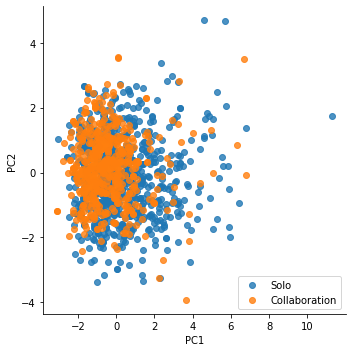

In [8]:
df_pcs['song_type'] = data['song_type'] # adicionando a coluna do tipo da música

# Visualizando os dois componentes principais resultantes 
sns.lmplot(x="PC1", y="PC2", data=df_pcs, fit_reg=False, hue='song_type', legend=False)
plt.legend(loc='lower right')
plt.show()

Através dessa análise visual, podemos ver que, aparentemente, não há diferença significativa entre as músicas *Solo* e *Colaborações* em relação às suas características acústicas. Isso, porque os dois grupos demonstram comportamentos bem similares.

#### 5. Variância explicada

Após a extração dos componentes principais, podemos verificar a quantidade de informações ou a variação que cada componente principal mantém após projetar os dados em um subespaço de dimensão inferior. Para isso, utilizamos a propriedade `explained_variance_ratio`:

In [9]:
print('Variação explicada por componentes principais: {}'.format(
    pca_resultado.explained_variance_ratio_))

Variação explicada por componentes principais: [0.20466025 0.10812242]


Como resultado, podemos observar que o primeiro componente principal detém 20,5% das informações, enquanto o segundo apenas 10,8% das informações. Juntos, os dois componentes contêm 30,85% das informações.

Ou seja, ao reduzir a dimensionalidade do conjunto de dados para duas dimensões, 69,15% das informações originais foram perdidas. Uma solução para aumentar as informações seria aumentar o número de dimensões (i.e., componentes principais) ao aplicar o PCA.

Vamos testar com 10 dimensões 👀

In [10]:
# Calculando os dois componentes principais
pca_resultado = PCA(n_components=10)
componentes = pca_resultado.fit_transform(X) # extraindo os dois componentes

print(f'Variação explicada por componentes principais: {round(sum(pca_resultado.explained_variance_ratio_)*100,1)}%')

Variação explicada por componentes principais: 90.8%


Assim, aumentando o número de dimensões, percebemos que as informações aumentam consideravelmente.

## Conclusão

Este notebook apresentou como reduzir a dimensionalidade dos dados utilizando o algoritmo PCA.

🔎 **Se interessou?** Para mais técnicas de redução de dados, você pode dar uma olhada na biblioteca `sklearn`: [Unsupervised dimensionality reduction](https://scikit-learn.org/stable/modules/unsupervised_reduction.html)

---

Este foi o fim desta parte do tutorial sobre prepação de dados. A próxima parte ([5.Ciencia.de.Dados](https://drive.google.com/file/d/1sEk4rIcuxQS66ZCVDIEUEXwwSXLHAky-/view?usp=sharing)) apresentará como fazer analise exploratória dos dados como parte da ciência de dados.